### Test LinUCB, ThresholdBandit and GreedyBandit

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

from lib.bandits import LinUCB, ThresholdBandit 
from lib.generator import LinearGeneratorParams, LinearGenerator
import numpy as np 

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
def first_nonzero(arr, axis, invalid_val=-1):
    mask = arr!=0
    return np.where(mask.any(axis=axis), mask.argmax(axis=axis), invalid_val)

def smooth(y, box_pts=100):
    box = np.ones(box_pts)/box_pts
    if len(y.shape) == 2:
        y_smooth = y.copy()
        for i in range(y.shape[0]):
            y_smooth[i,:] = np.convolve(y[i,:], box, mode='same')
    else:
        y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

In [3]:
#alphas = truncnorm.rvs(-max_alpha, max_alpha, scale = 1, size=(M,k,d-1))
#betas = truncnorm.rvs(-max_beta, max_beta, scale = 1, size=(M,k))

alphas = np.array([[0, 2]]).T
betas = np.array([1, 0])
N = 3000
M = 100
params = LinearGeneratorParams(alphas, betas)
generator = LinearGenerator(params)

### LinUCB 

In [12]:
linucb = LinUCB(generator)

linucb_pred = np.zeros((M, 2, N))
linucb_upper = np.zeros((M, 2, N))
linucb_lower = np.zeros((M, 2, N))

regret_ucb = np.zeros(N)

for i in range(N):
    (ctx, arm_idx, obs, reg) = linucb.step()
    p0, u0, l0 = linucb.pred_arm(0, M)
    p1, u1, l1 = linucb.pred_arm(1, M)
    linucb_pred[:,0,i] = p0
    linucb_upper[:,0,i] = u0
    linucb_lower[:,0,i] = l0
    linucb_pred[:,1,i] = p1
    linucb_upper[:,1,i] = u1
    linucb_lower[:,1,i] = l1    
    regret_ucb[i] = reg
    #print np.sqrt(np.log(np.linalg.det(linucb.V)))
    arm = linucb.arms([1, 0.5], arm_idx)
    pred = linucb.beta(linucb.V)*np.sqrt(np.dot(arm.T, np.dot(np.linalg.inv(linucb.V), arm)))
    print pred
    
theta = np.dot(np.linalg.inv(linucb.V), linucb.U)
print(theta)

2.48577157262
2.55896013387
2.26201255924
2.15554988282
1.93993543636
1.95286004574
1.81390503284
1.76611168019
1.67609709802
1.64926184642
1.63076488957
1.57253971379
1.55390252907
1.51255667436
1.37554389146
1.48730359455
1.40725782794
1.34022954236
1.33457349863
1.26385463368
1.29684352093
1.2492419
1.25177349891
1.20866139615
1.2095865101
1.17113707164
1.19401241085
1.17985521348
1.12954989845
1.14788229925
1.11070576837
1.11657762228
1.09285957579
1.07198109681
1.06260146241
1.05355092856
1.09655075904
1.06609438472
1.02561126188
1.01949242769
1.04297322921
1.02003035845
1.02200738488
1.01859233795
1.00092727708
0.983442224213
0.976303212271
0.967605009202
0.95903271279
0.953392971766
0.95601298943
0.943773703923
0.935743822893
0.93255789457
0.932391463616
0.911775777778
0.90251290833
0.885894051369
0.937052788179
0.93248713773
0.907770323437
0.874855171357
0.883546801604
0.878897086829
0.865100459919
0.851318563894
0.878742417989
0.838044730093
0.871051416194
0.864693614732
0.831

0.451580157424
0.424204102769
0.451552367645
0.45124528391
0.422629726392
0.422388194762
0.421986148389
0.42190937628
0.450078781475
0.449282302847
0.449166294587
0.421938767967
0.447779583716
0.421699056962
0.421150092709
0.421211165024
0.421194197073
0.420937306338
0.448020290181
0.420538747991
0.420127683994
0.446521839086
0.420183020127
0.420190654916
0.444822065005
0.418976114998
0.443147120642
0.419108020832
0.443063079262
0.418894610961
0.443156077194
0.417607957489
0.416163447176
0.415643741548
0.441990110417
0.441280612096
0.439809952662
0.415570637737
0.439561872249
0.415068616143
0.439655169949
0.414875641714
0.439006452785
0.439066512691
0.414407032627
0.4144684134
0.438271236494
0.438251638031
0.414577333943
0.43834543405
0.414653264031
0.414547400688
0.437333449587
0.414649111388
0.414644921159
0.413282982946
0.437241442948
0.437252122728
0.436431297047
0.413113591861
0.413085640208
0.413039375109
0.413096789978
0.436624097007
0.413102217957
0.411751991678
0.435262864034


0.380883991073
0.38074149256
0.358968257475
0.380774284769
0.358550641676
0.380482301091
0.358555805722
0.380507252856
0.358604264792
0.358147404874
0.38048984541
0.358079538154
0.358099596989
0.357833680845
0.380558244769
0.357870698166
0.357889669543
0.357669373249
0.357676915391
0.380529154111
0.357696753977
0.379789029179
0.379799676096
0.357648384051
0.357658461168
0.379858251648
0.379734746508
0.357612322821
0.357544494757
0.35756206115
0.379804129795
0.379813544716
0.357301091706
0.379090391266
0.357321100226
0.379125888102
0.379147234702
0.357179323031
0.357187339979
0.356879045973
0.356754019712
0.35674191612
0.356305903585
0.379022037116
0.356333194974
0.379018821742
0.378358317406
0.356388208684
0.378205624726
0.356403405592
0.377479487969
0.377341429732
0.377361796335
0.377350654837
0.356494907446
0.35648922498
0.356430004837
0.356439251026
0.356422343904
0.356439276664
0.37710739877
0.35580893947
0.355817496
0.376896015649
0.355628936031
0.35564601254
0.37691582577
0.35506

0.341005232902
0.340831863662
0.323243732271
0.323041730981
0.322684215625
0.322613772851
0.340611537652
0.322276280239
0.322150116489
0.340053059168
0.339742228298
0.322187216185
0.322197113413
0.322202071058
0.322212328477
0.322211282959
0.322183124154
0.321974585784
0.321949955838
0.339778564701
0.321967083517
0.321974994861
0.321574378423
0.339396212147
0.321569923262
0.339383227103
0.321597931687
0.339400804664
0.321266104853
0.339423583646
0.321282226396
0.339402935972
0.339390817309
0.339069417457
0.339015538926
0.320985079967
0.320725329064
0.338753273207
0.32072147076
0.320454071381
0.338632932016
0.338642261754
0.320470114665
0.320349036537
0.320090836702
0.338370342939
0.319828120484
0.338310457996
0.338238345036
0.338215897492
0.337818173639
0.319870796972
0.319629876044
0.319620589016
0.319551177485
0.337627607773
0.319477207295
0.337644234022
0.319209218726
0.337595704534
0.319221092955
0.319230766333
0.337625877555
0.319207479934
0.31908400754
0.337640843608
0.3375314991

0.307647585343
0.300854932637
0.307643748528
0.300722431114
0.307368027361
0.300581822553
0.307368093445
0.300592854083
0.307368825793
0.30044984499
0.300265063102
0.300265896398
0.300269206385
0.300271396856
0.307260988703
0.307011330862
0.307018401392
0.300225508188
0.306947990224
0.30663920708
0.300071025145
0.300069037042
0.306654779293
0.306439379904
0.306430684128
0.306428827601
0.306425288547
0.306266475667
0.300084022445
0.306270501977
0.299897363822
0.306281776735
0.306278072872
0.299883999361
0.299858253325
0.299488589154
0.306305102874
0.299469742251
0.306025866278
0.299461274202
0.299467072916
0.299409235343
0.299415792646
0.30571509374
0.299125499797
0.299128589072
0.298936651141
0.298941102596
0.298721576735
0.298653657078
0.305762411784
0.305716395371
0.305722400948
0.298671408498
0.298640937339
0.298597192491
0.298396714641
0.298396234738
0.305733723915
0.305570896023
0.305577789807
0.305575712432
0.305241121994
0.305240009712
0.305113913063
0.304786993879
0.30463874554

KeyboardInterrupt: 

In [5]:
#Make plots of LinUCB confidence interval
xvals = np.linspace(-0.5, 1.5, M)
preds = np.zeros((M, 2))
preds_up = np.zeros((M, 2))
preds_low = np.zeros((M, 2))
for arm_idx in range(2):
    for i in range(M):
        preds[i,arm_idx] = linucb.predict([1, xvals[i]], arm_idx)
        preds_up[i,arm_idx] = linucb.predict_upper([1, xvals[i]], arm_idx)
        preds_low[i,arm_idx] = linucb.predict_lower([1, xvals[i]], arm_idx)

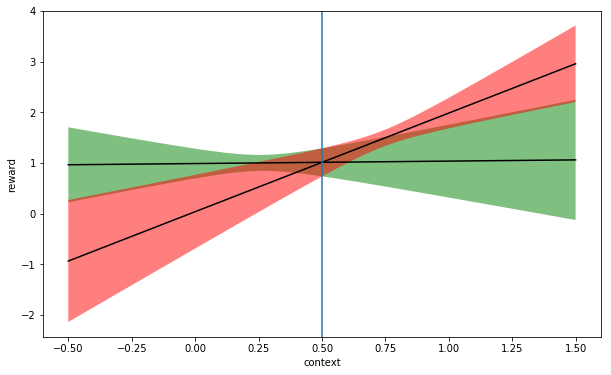

In [6]:
plt.fill_between(xvals, preds_low[:,0], preds_up[:,0], facecolor='green', alpha = 0.5)
plt.plot(xvals, preds[:,0], color='black')

plt.fill_between(xvals, preds_low[:,1], preds_up[:,1], facecolor='red', alpha = 0.5)
plt.plot(xvals, preds[:,1], color='black')

plt.axvline(x = 0.5)

plt.xlabel('context')
plt.ylabel('reward')

In [ ]:
#Do confidence bounds decrease with iterations?

### Threshold bandit

In [4]:
threshold = 0.8
thresholdbandit = ThresholdBandit(generator, threshold)
#print thresholdbandit.threshold

N = 3000

thresh_pred = np.zeros((M, 2, N))
thresh_upper = np.zeros((M, 2, N))
thresh_lower = np.zeros((M, 2, N))

#Record if the policy changes

regret_thr = np.zeros((N))
for i in range(N):
    (ctx, arm_idx, obs, reg) = thresholdbandit.step()
    regret_thr[i] = reg
    p0, u0, l0 = thresholdbandit.pred_arm(0, M)
    p1, u1, l1 = thresholdbandit.pred_arm(1, M)
    thresh_pred[:,0,i] = p0
    thresh_upper[:,0,i] = u0
    thresh_lower[:,0,i] = l0
    thresh_pred[:,1,i] = p1
    thresh_upper[:,1,i] = u1
    thresh_lower[:,1,i] = l1
    #thr = thresholdbandit.threshold
    #lb = thresholdbandit.lower_bound
    #ub = thresholdbandit.upper_bound
    print("i:%d,ctx:%f,arm:%d,rew:%f,regret:%f"%(i, ctx[1], arm_idx, obs, reg))

theta = np.dot(np.linalg.inv(thresholdbandit.V), thresholdbandit.U)
print(theta)

i:0,ctx:0.275131,arm:1,rew:0.584958,regret:0.449738
i:1,ctx:0.401008,arm:1,rew:0.753805,regret:0.197983
i:2,ctx:0.154613,arm:1,rew:0.252771,regret:0.690774
i:3,ctx:0.706318,arm:1,rew:1.500511,regret:0.000000
i:4,ctx:0.342288,arm:1,rew:0.648053,regret:0.315423
i:5,ctx:0.061134,arm:1,rew:0.073500,regret:0.877732
i:6,ctx:0.838559,arm:1,rew:1.596908,regret:0.000000
i:7,ctx:0.164179,arm:1,rew:0.154427,regret:0.671642
i:8,ctx:0.077377,arm:1,rew:0.046326,regret:0.845245
Updating theta_tilde
i:9,ctx:0.930961,arm:1,rew:1.948009,regret:0.000000
i:10,ctx:0.808824,arm:1,rew:1.601709,regret:0.000000
i:11,ctx:0.845637,arm:1,rew:1.613223,regret:0.000000
i:12,ctx:0.996889,arm:1,rew:1.934831,regret:0.000000
i:13,ctx:0.129868,arm:0,rew:0.900064,regret:0.000000
i:14,ctx:0.700632,arm:1,rew:1.107688,regret:0.000000
i:15,ctx:0.725190,arm:1,rew:1.545641,regret:0.000000
i:16,ctx:0.823931,arm:1,rew:1.641329,regret:0.000000
i:17,ctx:0.639816,arm:1,rew:1.318832,regret:0.000000
i:18,ctx:0.864299,arm:1,rew:1.80978

i:158,ctx:0.995583,arm:1,rew:1.800174,regret:0.000000
i:159,ctx:0.697510,arm:1,rew:1.446193,regret:0.000000
i:160,ctx:0.326920,arm:0,rew:1.026955,regret:0.000000
i:161,ctx:0.866708,arm:1,rew:1.808631,regret:0.000000
i:162,ctx:0.823433,arm:1,rew:1.625371,regret:0.000000
i:163,ctx:0.537810,arm:1,rew:0.988307,regret:0.000000
i:164,ctx:0.421463,arm:1,rew:0.819232,regret:0.157075
i:165,ctx:0.470486,arm:1,rew:1.179819,regret:0.059028
i:166,ctx:0.645246,arm:1,rew:1.301986,regret:0.000000
i:167,ctx:0.469995,arm:1,rew:0.859494,regret:0.060010
i:168,ctx:0.752016,arm:1,rew:1.669129,regret:0.000000
i:169,ctx:0.503593,arm:1,rew:0.976440,regret:0.000000
i:170,ctx:0.681628,arm:1,rew:1.358603,regret:0.000000
i:171,ctx:0.280944,arm:0,rew:1.089793,regret:0.000000
i:172,ctx:0.249986,arm:0,rew:1.072575,regret:0.000000
i:173,ctx:0.837387,arm:1,rew:1.757181,regret:0.000000
i:174,ctx:0.357833,arm:0,rew:1.086688,regret:0.000000
i:175,ctx:0.515454,arm:1,rew:0.991237,regret:0.000000
i:176,ctx:0.209376,arm:0,rew

i:313,ctx:0.252732,arm:0,rew:0.959534,regret:0.000000
i:314,ctx:0.684089,arm:1,rew:1.332456,regret:0.000000
i:315,ctx:0.204723,arm:0,rew:1.051795,regret:0.000000
i:316,ctx:0.754838,arm:1,rew:1.467593,regret:0.000000
i:317,ctx:0.692222,arm:1,rew:1.330533,regret:0.000000
i:318,ctx:0.541038,arm:0,rew:0.968829,regret:0.082077
i:319,ctx:0.589402,arm:1,rew:1.081146,regret:0.000000
i:320,ctx:0.441473,arm:0,rew:1.045543,regret:0.000000
i:321,ctx:0.510378,arm:0,rew:1.071328,regret:0.020755
i:322,ctx:0.308588,arm:0,rew:0.817399,regret:0.000000
i:323,ctx:0.161945,arm:0,rew:0.817383,regret:0.000000
i:324,ctx:0.760932,arm:1,rew:1.710907,regret:0.000000
i:325,ctx:0.707696,arm:1,rew:1.424990,regret:0.000000
i:326,ctx:0.290193,arm:0,rew:1.012937,regret:0.000000
i:327,ctx:0.198671,arm:0,rew:1.075926,regret:0.000000
i:328,ctx:0.818118,arm:1,rew:1.690764,regret:0.000000
i:329,ctx:0.143214,arm:0,rew:0.895908,regret:0.000000
i:330,ctx:0.738805,arm:1,rew:1.418757,regret:0.000000
i:331,ctx:0.598291,arm:1,rew

i:471,ctx:0.515289,arm:0,rew:1.003163,regret:0.030579
i:472,ctx:0.009966,arm:0,rew:0.961686,regret:0.000000
i:473,ctx:0.040115,arm:0,rew:1.139672,regret:0.000000
i:474,ctx:0.288254,arm:0,rew:1.037830,regret:0.000000
i:475,ctx:0.011910,arm:0,rew:0.956547,regret:0.000000
i:476,ctx:0.603283,arm:1,rew:1.247811,regret:0.000000
i:477,ctx:0.232126,arm:0,rew:0.938417,regret:0.000000
i:478,ctx:0.119835,arm:0,rew:0.947210,regret:0.000000
i:479,ctx:0.164377,arm:0,rew:0.834347,regret:0.000000
i:480,ctx:0.769779,arm:1,rew:1.463733,regret:0.000000
i:481,ctx:0.703086,arm:1,rew:1.302317,regret:0.000000
i:482,ctx:0.526047,arm:0,rew:0.854573,regret:0.052094
i:483,ctx:0.542377,arm:0,rew:0.960272,regret:0.084754
i:484,ctx:0.121501,arm:0,rew:0.935732,regret:0.000000
i:485,ctx:0.209247,arm:0,rew:1.031117,regret:0.000000
i:486,ctx:0.525577,arm:0,rew:0.963810,regret:0.051154
i:487,ctx:0.991973,arm:1,rew:1.912262,regret:0.000000
i:488,ctx:0.195178,arm:0,rew:0.945866,regret:0.000000
i:489,ctx:0.902760,arm:1,rew

i:631,ctx:0.291060,arm:0,rew:0.917371,regret:0.000000
i:632,ctx:0.898513,arm:1,rew:1.760914,regret:0.000000
i:633,ctx:0.586202,arm:1,rew:1.071612,regret:0.000000
i:634,ctx:0.139236,arm:0,rew:0.913905,regret:0.000000
i:635,ctx:0.455392,arm:0,rew:1.019956,regret:0.000000
i:636,ctx:0.469666,arm:0,rew:1.068802,regret:0.000000
i:637,ctx:0.702144,arm:1,rew:1.421417,regret:0.000000
i:638,ctx:0.082811,arm:0,rew:1.098077,regret:0.000000
i:639,ctx:0.403559,arm:0,rew:1.055871,regret:0.000000
i:640,ctx:0.151785,arm:0,rew:0.976923,regret:0.000000
i:641,ctx:0.359950,arm:0,rew:0.929797,regret:0.000000
i:642,ctx:0.436469,arm:0,rew:1.102726,regret:0.000000
i:643,ctx:0.696777,arm:1,rew:1.404953,regret:0.000000
i:644,ctx:0.743282,arm:1,rew:1.298449,regret:0.000000
i:645,ctx:0.083735,arm:0,rew:1.131667,regret:0.000000
i:646,ctx:0.255629,arm:0,rew:1.008416,regret:0.000000
i:647,ctx:0.301467,arm:0,rew:0.858108,regret:0.000000
i:648,ctx:0.208709,arm:0,rew:0.864244,regret:0.000000
i:649,ctx:0.901881,arm:1,rew

i:789,ctx:0.855760,arm:1,rew:1.776895,regret:0.000000
i:790,ctx:0.692167,arm:1,rew:1.426008,regret:0.000000
i:791,ctx:0.351531,arm:0,rew:1.062334,regret:0.000000
i:792,ctx:0.495611,arm:0,rew:0.974870,regret:0.000000
i:793,ctx:0.595060,arm:1,rew:1.328528,regret:0.000000
i:794,ctx:0.348643,arm:0,rew:0.971334,regret:0.000000
i:795,ctx:0.908357,arm:1,rew:1.943615,regret:0.000000
i:796,ctx:0.717339,arm:1,rew:1.447506,regret:0.000000
i:797,ctx:0.865050,arm:1,rew:1.597440,regret:0.000000
i:798,ctx:0.775004,arm:1,rew:1.523662,regret:0.000000
i:799,ctx:0.249818,arm:0,rew:1.184510,regret:0.000000
i:800,ctx:0.737546,arm:1,rew:1.528230,regret:0.000000
i:801,ctx:0.600981,arm:1,rew:1.293003,regret:0.000000
i:802,ctx:0.304107,arm:0,rew:0.919116,regret:0.000000
i:803,ctx:0.943154,arm:1,rew:1.885337,regret:0.000000
i:804,ctx:0.148399,arm:0,rew:0.969195,regret:0.000000
i:805,ctx:0.184355,arm:0,rew:1.072780,regret:0.000000
i:806,ctx:0.973982,arm:1,rew:1.969238,regret:0.000000
i:807,ctx:0.665241,arm:1,rew

i:948,ctx:0.714674,arm:1,rew:1.507809,regret:0.000000
i:949,ctx:0.163965,arm:0,rew:1.152735,regret:0.000000
i:950,ctx:0.462640,arm:0,rew:1.108976,regret:0.000000
i:951,ctx:0.158165,arm:0,rew:1.166327,regret:0.000000
i:952,ctx:0.688651,arm:1,rew:1.432183,regret:0.000000
i:953,ctx:0.807339,arm:1,rew:1.613137,regret:0.000000
i:954,ctx:0.449900,arm:0,rew:0.968819,regret:0.000000
i:955,ctx:0.009538,arm:0,rew:0.947734,regret:0.000000
i:956,ctx:0.133687,arm:0,rew:0.867873,regret:0.000000
i:957,ctx:0.895334,arm:1,rew:1.762170,regret:0.000000
i:958,ctx:0.222139,arm:0,rew:1.070029,regret:0.000000
i:959,ctx:0.337515,arm:0,rew:0.988068,regret:0.000000
i:960,ctx:0.186148,arm:0,rew:0.949742,regret:0.000000
i:961,ctx:0.006724,arm:0,rew:1.074366,regret:0.000000
i:962,ctx:0.568853,arm:1,rew:1.343479,regret:0.000000
i:963,ctx:0.061762,arm:0,rew:0.909019,regret:0.000000
i:964,ctx:0.798845,arm:1,rew:1.456461,regret:0.000000
i:965,ctx:0.700087,arm:1,rew:1.319797,regret:0.000000
i:966,ctx:0.054107,arm:0,rew

i:1103,ctx:0.746660,arm:1,rew:1.598123,regret:0.000000
i:1104,ctx:0.899762,arm:1,rew:1.787454,regret:0.000000
i:1105,ctx:0.695241,arm:1,rew:1.523780,regret:0.000000
i:1106,ctx:0.249045,arm:0,rew:1.100521,regret:0.000000
i:1107,ctx:0.766557,arm:1,rew:1.664127,regret:0.000000
i:1108,ctx:0.517366,arm:0,rew:1.104934,regret:0.034733
i:1109,ctx:0.023547,arm:0,rew:1.010488,regret:0.000000
i:1110,ctx:0.113711,arm:0,rew:0.813100,regret:0.000000
i:1111,ctx:0.922056,arm:1,rew:1.839392,regret:0.000000
i:1112,ctx:0.789075,arm:1,rew:1.586094,regret:0.000000
i:1113,ctx:0.497464,arm:0,rew:1.091200,regret:0.000000
i:1114,ctx:0.911864,arm:1,rew:1.878323,regret:0.000000
i:1115,ctx:0.432009,arm:0,rew:0.943608,regret:0.000000
i:1116,ctx:0.894063,arm:1,rew:1.848616,regret:0.000000
i:1117,ctx:0.620495,arm:1,rew:1.317000,regret:0.000000
i:1118,ctx:0.244627,arm:0,rew:1.109590,regret:0.000000
i:1119,ctx:0.088021,arm:0,rew:1.045074,regret:0.000000
i:1120,ctx:0.686172,arm:1,rew:1.448197,regret:0.000000
i:1121,ctx

i:1253,ctx:0.153455,arm:0,rew:0.965155,regret:0.000000
i:1254,ctx:0.329268,arm:0,rew:1.146734,regret:0.000000
i:1255,ctx:0.233277,arm:0,rew:1.158329,regret:0.000000
i:1256,ctx:0.339614,arm:0,rew:0.963349,regret:0.000000
i:1257,ctx:0.595367,arm:1,rew:1.347995,regret:0.000000
i:1258,ctx:0.654748,arm:1,rew:1.318538,regret:0.000000
i:1259,ctx:0.500488,arm:0,rew:0.928646,regret:0.000977
i:1260,ctx:0.301702,arm:0,rew:0.764674,regret:0.000000
i:1261,ctx:0.528618,arm:0,rew:1.183326,regret:0.057236
i:1262,ctx:0.802492,arm:1,rew:1.641176,regret:0.000000
i:1263,ctx:0.278399,arm:0,rew:1.108005,regret:0.000000
i:1264,ctx:0.726056,arm:1,rew:1.427541,regret:0.000000
i:1265,ctx:0.923424,arm:1,rew:1.723190,regret:0.000000
i:1266,ctx:0.675664,arm:1,rew:1.239400,regret:0.000000
i:1267,ctx:0.304425,arm:0,rew:1.020497,regret:0.000000
i:1268,ctx:0.520957,arm:0,rew:1.052308,regret:0.041913
i:1269,ctx:0.961300,arm:1,rew:2.101502,regret:0.000000
i:1270,ctx:0.315642,arm:0,rew:1.010711,regret:0.000000
i:1271,ctx

i:1406,ctx:0.067300,arm:0,rew:0.977780,regret:0.000000
i:1407,ctx:0.034939,arm:0,rew:0.991053,regret:0.000000
i:1408,ctx:0.487276,arm:0,rew:1.130703,regret:0.000000
i:1409,ctx:0.863172,arm:1,rew:1.604364,regret:0.000000
i:1410,ctx:0.249535,arm:0,rew:0.980814,regret:0.000000
i:1411,ctx:0.220826,arm:0,rew:1.261516,regret:0.000000
i:1412,ctx:0.931230,arm:1,rew:1.754120,regret:0.000000
i:1413,ctx:0.133521,arm:0,rew:0.862097,regret:0.000000
i:1414,ctx:0.343618,arm:0,rew:0.916744,regret:0.000000
i:1415,ctx:0.263944,arm:0,rew:0.968119,regret:0.000000
i:1416,ctx:0.780288,arm:1,rew:1.598355,regret:0.000000
i:1417,ctx:0.105960,arm:0,rew:1.058157,regret:0.000000
i:1418,ctx:0.425538,arm:0,rew:0.833488,regret:0.000000
i:1419,ctx:0.556760,arm:1,rew:1.185838,regret:0.000000
i:1420,ctx:0.469218,arm:0,rew:0.964189,regret:0.000000
i:1421,ctx:0.213899,arm:0,rew:1.135236,regret:0.000000
i:1422,ctx:0.491995,arm:0,rew:1.108032,regret:0.000000
i:1423,ctx:0.753145,arm:1,rew:1.443617,regret:0.000000
i:1424,ctx

i:1556,ctx:0.683493,arm:1,rew:1.366819,regret:0.000000
i:1557,ctx:0.964621,arm:1,rew:2.020598,regret:0.000000
i:1558,ctx:0.803804,arm:1,rew:1.729521,regret:0.000000
i:1559,ctx:0.360370,arm:0,rew:0.979655,regret:0.000000
i:1560,ctx:0.619880,arm:1,rew:1.091120,regret:0.000000
i:1561,ctx:0.656933,arm:1,rew:1.215360,regret:0.000000
i:1562,ctx:0.758537,arm:1,rew:1.422388,regret:0.000000
i:1563,ctx:0.645781,arm:1,rew:1.066053,regret:0.000000
i:1564,ctx:0.011662,arm:0,rew:0.934336,regret:0.000000
i:1565,ctx:0.753574,arm:1,rew:1.451036,regret:0.000000
i:1566,ctx:0.287508,arm:0,rew:1.011281,regret:0.000000
i:1567,ctx:0.603211,arm:1,rew:1.300473,regret:0.000000
i:1568,ctx:0.761166,arm:1,rew:1.469693,regret:0.000000
i:1569,ctx:0.374183,arm:0,rew:0.883815,regret:0.000000
i:1570,ctx:0.985518,arm:1,rew:1.949294,regret:0.000000
i:1571,ctx:0.209712,arm:0,rew:1.003484,regret:0.000000
i:1572,ctx:0.273804,arm:0,rew:0.842376,regret:0.000000
i:1573,ctx:0.385773,arm:0,rew:1.022946,regret:0.000000
i:1574,ctx

i:1712,ctx:0.677684,arm:1,rew:1.369876,regret:0.000000
i:1713,ctx:0.845813,arm:1,rew:1.728873,regret:0.000000
i:1714,ctx:0.690081,arm:1,rew:1.313842,regret:0.000000
i:1715,ctx:0.411736,arm:0,rew:1.081513,regret:0.000000
i:1716,ctx:0.690133,arm:1,rew:1.547382,regret:0.000000
i:1717,ctx:0.062441,arm:0,rew:0.929871,regret:0.000000
i:1718,ctx:0.097865,arm:0,rew:1.132936,regret:0.000000
i:1719,ctx:0.390521,arm:0,rew:0.918461,regret:0.000000
i:1720,ctx:0.684884,arm:1,rew:1.465862,regret:0.000000
i:1721,ctx:0.853399,arm:1,rew:1.790104,regret:0.000000
i:1722,ctx:0.693449,arm:1,rew:1.333180,regret:0.000000
i:1723,ctx:0.674828,arm:1,rew:1.304405,regret:0.000000
i:1724,ctx:0.327196,arm:0,rew:0.920229,regret:0.000000
i:1725,ctx:0.088074,arm:0,rew:1.228632,regret:0.000000
i:1726,ctx:0.027708,arm:0,rew:0.885628,regret:0.000000
i:1727,ctx:0.616405,arm:1,rew:1.251072,regret:0.000000
i:1728,ctx:0.124535,arm:0,rew:0.947242,regret:0.000000
i:1729,ctx:0.958915,arm:1,rew:2.118182,regret:0.000000
i:1730,ctx

i:1864,ctx:0.910066,arm:1,rew:1.775736,regret:0.000000
i:1865,ctx:0.871005,arm:1,rew:1.699812,regret:0.000000
i:1866,ctx:0.770203,arm:1,rew:1.542712,regret:0.000000
i:1867,ctx:0.121039,arm:0,rew:1.045263,regret:0.000000
i:1868,ctx:0.467844,arm:0,rew:0.902036,regret:0.000000
i:1869,ctx:0.601130,arm:1,rew:1.062241,regret:0.000000
i:1870,ctx:0.244955,arm:0,rew:0.974949,regret:0.000000
i:1871,ctx:0.165921,arm:0,rew:1.038381,regret:0.000000
i:1872,ctx:0.918738,arm:1,rew:2.081828,regret:0.000000
i:1873,ctx:0.557222,arm:1,rew:1.012979,regret:0.000000
i:1874,ctx:0.807476,arm:1,rew:1.571112,regret:0.000000
i:1875,ctx:0.690492,arm:1,rew:1.462891,regret:0.000000
i:1876,ctx:0.416675,arm:0,rew:1.073816,regret:0.000000
i:1877,ctx:0.754007,arm:1,rew:1.453603,regret:0.000000
i:1878,ctx:0.064174,arm:0,rew:0.853470,regret:0.000000
i:1879,ctx:0.692595,arm:1,rew:1.516290,regret:0.000000
i:1880,ctx:0.289746,arm:0,rew:1.140659,regret:0.000000
i:1881,ctx:0.963213,arm:1,rew:1.977706,regret:0.000000
i:1882,ctx

i:2014,ctx:0.479421,arm:0,rew:1.109145,regret:0.000000
i:2015,ctx:0.374739,arm:0,rew:1.189762,regret:0.000000
i:2016,ctx:0.970570,arm:1,rew:1.995079,regret:0.000000
i:2017,ctx:0.795694,arm:1,rew:1.549323,regret:0.000000
i:2018,ctx:0.944536,arm:1,rew:1.751491,regret:0.000000
i:2019,ctx:0.450534,arm:0,rew:0.979318,regret:0.000000
i:2020,ctx:0.458527,arm:0,rew:0.948459,regret:0.000000
i:2021,ctx:0.572243,arm:1,rew:1.262182,regret:0.000000
i:2022,ctx:0.038971,arm:0,rew:0.838868,regret:0.000000
i:2023,ctx:0.345714,arm:0,rew:1.131101,regret:0.000000
i:2024,ctx:0.816008,arm:1,rew:1.523817,regret:0.000000
i:2025,ctx:0.856008,arm:1,rew:1.516411,regret:0.000000
i:2026,ctx:0.528120,arm:0,rew:1.050289,regret:0.056240
i:2027,ctx:0.433707,arm:0,rew:0.915649,regret:0.000000
i:2028,ctx:0.334132,arm:0,rew:0.958110,regret:0.000000
i:2029,ctx:0.061155,arm:0,rew:0.953046,regret:0.000000
i:2030,ctx:0.519269,arm:0,rew:1.063098,regret:0.038537
i:2031,ctx:0.898279,arm:1,rew:1.838652,regret:0.000000
i:2032,ctx

i:2167,ctx:0.608460,arm:1,rew:1.100116,regret:0.000000
i:2168,ctx:0.525456,arm:0,rew:1.044528,regret:0.050911
i:2169,ctx:0.174682,arm:0,rew:0.907482,regret:0.000000
i:2170,ctx:0.007032,arm:0,rew:0.873647,regret:0.000000
i:2171,ctx:0.199587,arm:0,rew:0.853889,regret:0.000000
i:2172,ctx:0.510564,arm:0,rew:0.975572,regret:0.021128
i:2173,ctx:0.659199,arm:1,rew:1.524712,regret:0.000000
i:2174,ctx:0.347926,arm:0,rew:1.204654,regret:0.000000
i:2175,ctx:0.917296,arm:1,rew:1.955448,regret:0.000000
i:2176,ctx:0.427307,arm:0,rew:1.270756,regret:0.000000
i:2177,ctx:0.447754,arm:0,rew:0.987499,regret:0.000000
i:2178,ctx:0.728945,arm:1,rew:1.488661,regret:0.000000
i:2179,ctx:0.291780,arm:0,rew:0.944173,regret:0.000000
i:2180,ctx:0.834816,arm:1,rew:1.766261,regret:0.000000
i:2181,ctx:0.079311,arm:0,rew:0.933466,regret:0.000000
i:2182,ctx:0.002798,arm:0,rew:1.061776,regret:0.000000
i:2183,ctx:0.775125,arm:1,rew:1.559351,regret:0.000000
i:2184,ctx:0.330122,arm:0,rew:1.008361,regret:0.000000
i:2185,ctx

i:2319,ctx:0.889104,arm:1,rew:1.876072,regret:0.000000
i:2320,ctx:0.672107,arm:1,rew:1.398665,regret:0.000000
i:2321,ctx:0.681846,arm:1,rew:1.214704,regret:0.000000
i:2322,ctx:0.879083,arm:1,rew:1.771609,regret:0.000000
i:2323,ctx:0.276726,arm:0,rew:0.976469,regret:0.000000
i:2324,ctx:0.755884,arm:1,rew:1.648125,regret:0.000000
i:2325,ctx:0.309630,arm:0,rew:0.950897,regret:0.000000
i:2326,ctx:0.128501,arm:0,rew:0.952636,regret:0.000000
i:2327,ctx:0.370165,arm:0,rew:0.972126,regret:0.000000
i:2328,ctx:0.373449,arm:0,rew:1.209809,regret:0.000000
i:2329,ctx:0.011308,arm:0,rew:0.951690,regret:0.000000
i:2330,ctx:0.771980,arm:1,rew:1.479692,regret:0.000000
i:2331,ctx:0.910754,arm:1,rew:1.832447,regret:0.000000
i:2332,ctx:0.732959,arm:1,rew:1.397676,regret:0.000000
i:2333,ctx:0.942603,arm:1,rew:1.885206,regret:0.000000
i:2334,ctx:0.453210,arm:0,rew:1.055641,regret:0.000000
i:2335,ctx:0.665539,arm:1,rew:1.317343,regret:0.000000
i:2336,ctx:0.214170,arm:0,rew:1.085468,regret:0.000000
i:2337,ctx

i:2474,ctx:0.564310,arm:1,rew:1.184874,regret:0.000000
i:2475,ctx:0.439422,arm:0,rew:0.943829,regret:0.000000
i:2476,ctx:0.937764,arm:1,rew:1.850451,regret:0.000000
i:2477,ctx:0.402307,arm:0,rew:1.004270,regret:0.000000
i:2478,ctx:0.527676,arm:1,rew:0.961052,regret:0.000000
i:2479,ctx:0.623120,arm:1,rew:1.269649,regret:0.000000
i:2480,ctx:0.717416,arm:1,rew:1.586888,regret:0.000000
i:2481,ctx:0.597813,arm:1,rew:1.176342,regret:0.000000
i:2482,ctx:0.368825,arm:0,rew:0.958716,regret:0.000000
i:2483,ctx:0.970063,arm:1,rew:1.970300,regret:0.000000
i:2484,ctx:0.093452,arm:0,rew:1.006006,regret:0.000000
i:2485,ctx:0.692741,arm:1,rew:1.592586,regret:0.000000
i:2486,ctx:0.159922,arm:0,rew:1.059476,regret:0.000000
i:2487,ctx:0.777427,arm:1,rew:1.591899,regret:0.000000
i:2488,ctx:0.782352,arm:1,rew:1.591397,regret:0.000000
i:2489,ctx:0.507237,arm:1,rew:0.902859,regret:0.000000
i:2490,ctx:0.897998,arm:1,rew:1.948365,regret:0.000000
i:2491,ctx:0.393481,arm:0,rew:0.780222,regret:0.000000
i:2492,ctx

i:2624,ctx:0.329078,arm:0,rew:0.972598,regret:0.000000
i:2625,ctx:0.937579,arm:1,rew:1.805976,regret:0.000000
i:2626,ctx:0.389042,arm:0,rew:0.948850,regret:0.000000
i:2627,ctx:0.369677,arm:0,rew:1.053253,regret:0.000000
i:2628,ctx:0.078145,arm:0,rew:1.069388,regret:0.000000
i:2629,ctx:0.802375,arm:1,rew:1.521177,regret:0.000000
i:2630,ctx:0.665378,arm:1,rew:1.326004,regret:0.000000
i:2631,ctx:0.272746,arm:0,rew:0.949123,regret:0.000000
i:2632,ctx:0.804014,arm:1,rew:1.569802,regret:0.000000
i:2633,ctx:0.158852,arm:0,rew:0.956622,regret:0.000000
i:2634,ctx:0.458505,arm:0,rew:0.965297,regret:0.000000
i:2635,ctx:0.428790,arm:0,rew:1.077561,regret:0.000000
i:2636,ctx:0.917242,arm:1,rew:2.017364,regret:0.000000
i:2637,ctx:0.761149,arm:1,rew:1.678289,regret:0.000000
i:2638,ctx:0.950218,arm:1,rew:1.943936,regret:0.000000
i:2639,ctx:0.918105,arm:1,rew:1.790458,regret:0.000000
i:2640,ctx:0.529251,arm:1,rew:1.187001,regret:0.000000
i:2641,ctx:0.448219,arm:0,rew:1.091599,regret:0.000000
i:2642,ctx

i:2777,ctx:0.648033,arm:1,rew:1.275559,regret:0.000000
i:2778,ctx:0.406482,arm:0,rew:1.066219,regret:0.000000
i:2779,ctx:0.483728,arm:0,rew:1.154008,regret:0.000000
i:2780,ctx:0.817132,arm:1,rew:1.741228,regret:0.000000
i:2781,ctx:0.473667,arm:0,rew:1.004298,regret:0.000000
i:2782,ctx:0.034250,arm:0,rew:0.807265,regret:0.000000
i:2783,ctx:0.961178,arm:1,rew:1.903386,regret:0.000000
i:2784,ctx:0.633595,arm:1,rew:1.423645,regret:0.000000
i:2785,ctx:0.999873,arm:1,rew:2.231337,regret:0.000000
i:2786,ctx:0.857253,arm:1,rew:1.819080,regret:0.000000
i:2787,ctx:0.471601,arm:0,rew:1.062720,regret:0.000000
i:2788,ctx:0.262086,arm:0,rew:0.897023,regret:0.000000
i:2789,ctx:0.227218,arm:0,rew:0.912948,regret:0.000000
i:2790,ctx:0.337323,arm:0,rew:0.832070,regret:0.000000
i:2791,ctx:0.416230,arm:0,rew:1.080160,regret:0.000000
i:2792,ctx:0.969430,arm:1,rew:1.949229,regret:0.000000
i:2793,ctx:0.505665,arm:1,rew:1.014332,regret:0.000000
i:2794,ctx:0.889378,arm:1,rew:1.788922,regret:0.000000
i:2795,ctx

i:2932,ctx:0.747076,arm:1,rew:1.591431,regret:0.000000
i:2933,ctx:0.603108,arm:1,rew:1.102682,regret:0.000000
i:2934,ctx:0.402625,arm:0,rew:1.024208,regret:0.000000
i:2935,ctx:0.961790,arm:1,rew:1.831062,regret:0.000000
i:2936,ctx:0.340326,arm:0,rew:1.145156,regret:0.000000
i:2937,ctx:0.074324,arm:0,rew:1.007615,regret:0.000000
i:2938,ctx:0.070815,arm:0,rew:0.994914,regret:0.000000
i:2939,ctx:0.805428,arm:1,rew:1.710739,regret:0.000000
i:2940,ctx:0.300953,arm:0,rew:1.103033,regret:0.000000
i:2941,ctx:0.012592,arm:0,rew:0.992120,regret:0.000000
i:2942,ctx:0.652703,arm:1,rew:1.270676,regret:0.000000
i:2943,ctx:0.532092,arm:1,rew:1.083065,regret:0.000000
i:2944,ctx:0.647027,arm:1,rew:1.414630,regret:0.000000
i:2945,ctx:0.219207,arm:0,rew:1.162930,regret:0.000000
i:2946,ctx:0.522737,arm:1,rew:1.082351,regret:0.000000
i:2947,ctx:0.122122,arm:0,rew:1.015807,regret:0.000000
i:2948,ctx:0.488861,arm:1,rew:1.191873,regret:0.022278
i:2949,ctx:0.572148,arm:1,rew:1.170152,regret:0.000000
i:2950,ctx

In [5]:
theta = np.dot(np.linalg.inv(thresholdbandit.V), thresholdbandit.U)
print(theta)

[[ 0.99292291]
 [ 0.02315911]
 [ 0.02117689]
 [ 1.97232597]]


In [6]:
#Make plots of ThresholdBandit confidence interval
N = 100
xvals = np.linspace(-0.5, 1.5, N)
preds = np.zeros((N, 2))
preds_up = np.zeros((N, 2))
preds_low = np.zeros((N, 2))
for arm_idx in range(2):
    for i in range(N):
        preds[i,arm_idx] = thresholdbandit.predict([1, xvals[i]], arm_idx)
        preds_up[i,arm_idx] = thresholdbandit.predict_upper([1, xvals[i]], arm_idx)
        preds_low[i,arm_idx] = thresholdbandit.predict_lower([1, xvals[i]], arm_idx)

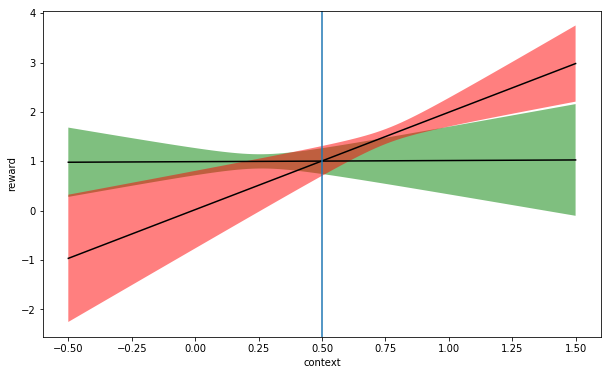

In [7]:
plt.fill_between(xvals, preds_low[:,0], preds_up[:,0], facecolor='green', alpha = 0.5)
plt.plot(xvals, preds[:,0], color='black')
plt.fill_between(xvals, preds_low[:,1], preds_up[:,1], facecolor='red', alpha = 0.5)
plt.plot(xvals, preds[:,1], color='black')
plt.axvline(x = 0.5)
plt.xlabel('context')
plt.ylabel('reward')

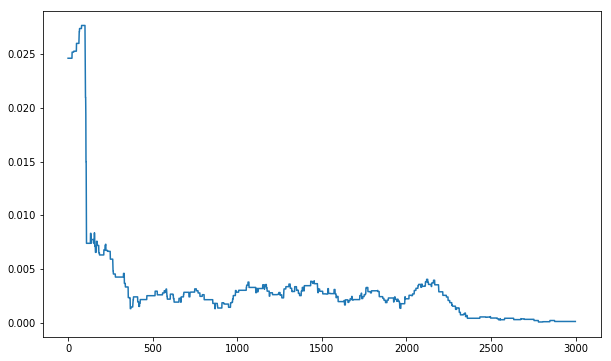

In [8]:
#Plot regret
plt.plot(smooth(regret_thr, box_pts = 200))

## Comparison of the two methods

Animation of convergence

Trade-off between convergence rate, risk, and confidence level

In [9]:
#Vary the confidence level, plot convergence rate, regret, risk
plt.plot(smooth(regret_ucb, box_pts = 200))
plt.plot(smooth(regret_thr, box_pts = 200))


NameError: name 'regret_ucb' is not defined